# Supervised Machine Learning Algorithm Model for Classification of Puffin Species from Input Body Measurements

My aim in this project is to create a supervised classifier model which can predict the species of puffin from an input of body mass, beak length, and beak depth.

## Initial Data Manipulation

Throughout this analysis, I will use the data manipulation and analysis library Pandas.

In [1]:
import pandas as pd

First step is to read in and view the raw data.

In [2]:
raw_data = pd.read_csv("puffins.csv")
raw_data

,body_mass_kg,wing_length_m,beak_length_mm,beak_depth_mm,species
0,4.0,0.2,39.3,19.4,Arctica
1,3.1,0.2,38.6,18.3,Arctica
2,3.7,0.2,40.8,16.7,Arctica
3,4.5,0.2,41.5,17.9,Arctica
4,3.3,0.2,42.3,17.1,Arctica
...,...,...,...,...,...
339,4.6,0.2,47.5,12.8,Corniculata
340,5.5,0.2,46.6,15.3,Corniculata
341,5.0,0.2,48.3,14.2,Corniculata
342,5.1,0.2,48.9,14.5,Corniculata


I will conduct a few basic checks of the raw data starting with the count of values in each column.

In [3]:
raw_data.count()

body_mass_kg      341
wing_length_m     341
beak_length_mm    342
beak_depth_mm     342
species           344
dtype: int64

There is a discrepancy in the count number between variables which means there may be NA values. Therefore, I will drop NA values and test the count number again.

In [4]:
data = pd.DataFrame.dropna(raw_data)
data

,body_mass_kg,wing_length_m,beak_length_mm,beak_depth_mm,species
0,4.0,0.2,39.3,19.4,Arctica
1,3.1,0.2,38.6,18.3,Arctica
2,3.7,0.2,40.8,16.7,Arctica
3,4.5,0.2,41.5,17.9,Arctica
4,3.3,0.2,42.3,17.1,Arctica
...,...,...,...,...,...
339,4.6,0.2,47.5,12.8,Corniculata
340,5.5,0.2,46.6,15.3,Corniculata
341,5.0,0.2,48.3,14.2,Corniculata
342,5.1,0.2,48.9,14.5,Corniculata


In [5]:
data.count()

body_mass_kg      340
wing_length_m     340
beak_length_mm    340
beak_depth_mm     340
species           340
dtype: int64

Discrepancy solved! However, I have noticed another strange aspect to our data. From what I can see, all of the wing length values are the exact same value: 0.2. Let's check this.

In [6]:
min_value = data['wing_length_m'].min()
min_value

0.2

In [7]:
max_value = data['wing_length_m'].max()
max_value

0.2

Yes, the values range from 0.2m to 0.2m. This does not provide us with any meaningful information as there is no variability or predictive power. So let's remove this variable.

In [8]:
data2 = data.drop('wing_length_m', axis=1)
data2

,body_mass_kg,beak_length_mm,beak_depth_mm,species
0,4.0,39.3,19.4,Arctica
1,3.1,38.6,18.3,Arctica
2,3.7,40.8,16.7,Arctica
3,4.5,41.5,17.9,Arctica
4,3.3,42.3,17.1,Arctica
...,...,...,...,...
339,4.6,47.5,12.8,Corniculata
340,5.5,46.6,15.3,Corniculata
341,5.0,48.3,14.2,Corniculata
342,5.1,48.9,14.5,Corniculata


## Visualisation

Time to visualise how the variables compare against each other across our three puffin species: Artica, Cirrhata, and Corniculata. For this, I'll use the Seaborn data visualization library.

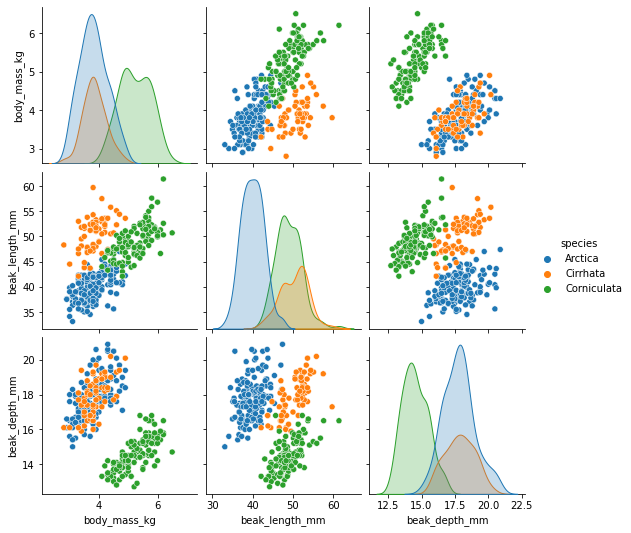

In [9]:
import seaborn as sns
sns.pairplot(data2, hue='species', diag_kind='kde')

Next, I would like to visualise how our three main variables correlate to each other.

<AxesSubplot:>

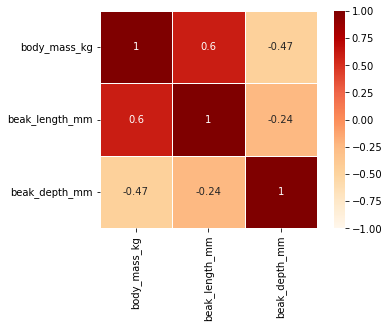

In [10]:
corr = data2.corr()
sns.heatmap(corr, vmin=-1.0, vmax=1.0, square=True, cmap="OrRd", annot=True, linewidth=0.5)

From this we can see that body mass (kg) and beak length (mm) are positively correlated, body mass (kg) and beak depth (mm) are negatively correlated, and beak length (mm) and beak depth (mm) are negatively correlated.

Interesting...let's see how we can apply an algorithm to use these variables to predict the puffin species. To do this, I will use the train test split function from the sklearn model selection module from the scikit-learn package. I'm going to test the support vector machine algorithm as it is an algorithm which is powerful and versatile while being appropriate for small-to-medium sized datasets and memory-efficient.

## Support Vector Machine Model

In [11]:
from sklearn.model_selection import train_test_split

X = data[["body_mass_kg", "beak_length_mm", "beak_depth_mm"]]  
y = data[["species"]]

train_X, test_X, train_y, test_y = train_test_split(X, y)

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

#create model
svm = make_pipeline(StandardScaler(), SVC())
svm

#train model
svm.fit(train_X.values, train_y.values.ravel())

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [13]:
# Predict from the test dataset
pred_svm = svm.predict(test_X.values)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(test_y, pred_svm)

1.0

The accuracy score reflects the accuracy of a Support Vector Machine model on the test dataset by making predictions and comparing them with the true values. In this case, the accuracy score is very high (>0.95) but it is important to review multiple metrics of assessing the model. 

One example is by creating a confusion matrix. A confusion matrix provides a summary of the predictions by showing the number of true positives, true negatives, false positives, and false negatives.

In [14]:
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(test_y, pred_svm)
print(cm_svm)

[[41  0  0]
 [ 0 16  0]
 [ 0  0 28]]


This shows us that the majority of the predictions were true positives which is promising. 

Another helpful tool is a classification report in which precision defines the ratio of true positives to the sum of true positive and false positives, recall defines the ratio of true positive to the sum of true positive and false negative, F1-score is the mean of precision and support is the number of actual occurrences of the class in the specified dataset.

In [15]:
from sklearn.metrics import classification_report
print(classification_report(test_y, pred_svm))

              precision    recall  f1-score   support

     Arctica       1.00      1.00      1.00        41
    Cirrhata       1.00      1.00      1.00        16
 Corniculata       1.00      1.00      1.00        28

    accuracy                           1.00        85
   macro avg       1.00      1.00      1.00        85
weighted avg       1.00      1.00      1.00        85



For all three species, the values for precision, recall, and f1 score are all very high. However, Corniculata ranks highest, then Arctica, then Cirrhata. Taking into account the accuracy score, confusion matrix, and classification report, I would propose that my model using a support vector machine is an appropriate one.


Therefore, let's use the model to predict the puffin species from some random input.

In [16]:
#Check max values for upper bounds of random input below
data2.max()

body_mass_kg              6.5
beak_length_mm           61.4
beak_depth_mm            20.9
species           Corniculata
dtype: object

In [17]:
import numpy as np

#input random variables for classifier
X_new_svm = np.random.randint(1, [[6.5, 61.4, 20.9]])
print(X_new_svm)

#Prediction of the species from the input vector
prediction_svm = svm.predict(X_new_svm)
print("Prediction of Species: {}".format(prediction_svm))

[[ 2 36  1]]
Prediction of Species: ['Arctica']


Alternatively, I could repeat that step with real-world readings.

In [19]:
#input random variables for classifier
chosen_X_new_svm = [[6.0, 58.0, 19.0]]
print(chosen_X_new_svm)

#Prediction of the species from the input vector
prediction_svm = svm.predict(chosen_X_new_svm)
print("Prediction of Species: {}".format(prediction_svm))

[[6.0, 58.0, 19.0]]
Prediction of Species: ['Corniculata']
